In [347]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
import chart_studio
import chart_studio.plotly as py
import plotly.io as pio
import chart_studio.tools as tls


In [8]:
username = 'acpoll' # your username
api_key = '7ZfGcp1AOEmf9x8XZx1c' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [9]:
games_10_df = pd.read_csv("clean_2010_data.csv")
games_14_df = pd.read_csv("clean_2014_data.csv")
games_18_df = pd.read_csv("clean_2018_data.csv")

In [10]:
teamFullName = {"ALG":"Algeria", "ARG":"Argentina", "AUS":"Australia", "BEL":"Belgium", "BIH":"Bosnia and Herzegovina",
                "BRA":"Brazil", "CHI":"Chile", "CIV":"Ivory Coast", "CMR":"Cameroon", "COL":"Colombia", "CRC":"Costa Rica",
                "CRO":"Croatia", "DEN":"Denmark", "ECU":"Ecuador", "EGY":"Egypt", "ENG":"England", "ESP":"Spain",
                "FRA":"France", "GER":"Germany", "GHA":"Ghana", "GRE":"Greece", "HON":"Honduras", "IRN":"Iran",
                "ISL":"Iceland", "ITA":"Italy", "JPN":"Japan", "KOR":"South Korea", "KSA":"Saudi Arabia", "MAR":"Morocco",
                "MEX":"Mexico", "NED":"Netherlands", "NGA":"Nigeria", "NZL":"New Zealand", "PAN":"Panama", "PAR":"Paraguay",
                "PER":"Peru", "POL":"Poland", "POR":"Portugal", "PRK":"North Korea", "RSA":"South Africa", "RUS":"Russia",
                "SEN":"Senegal", "SRB":"Serbia", "SUI":"Switzerland", "SVK":"Slovakia", "SVN":"Slovenia", "SWE":"Sweden",
                "TUN":"Tunisia", "URU":"Uruguay", "USA":"United States"}

games_10_df["TEAM"] = games_10_df["TEAM"].map(teamFullName)
games_14_df["TEAM"] = games_14_df["TEAM"].map(teamFullName)
games_18_df["TEAM"] = games_18_df["TEAM"].map(teamFullName)

In [11]:
# add new potentially relevant features from the 2018 WC 


teamAvgAge_18 = {"Russia":28.1, "Saudi Arabia":28.7, "Egypt":27.0, "Uruguay":28.7, "Morocco":27.2, "Iran":26.5,
              "Portugal":27.7, "Spain":28.0, "France":26.4, "Australia":26.9, "Argentina":28.4, "Iceland":29.0,
              "Peru":27.0, "Denmark":26.1, "Croatia":27.5, "Nigeria":25.0, "Costa Rica":29.0, "Serbia":27.7,
              "Germany":25.7, "Mexico":27.4, "Brazil":27.8, "Switzerland":26.6, "Sweden":27.4, "South Korea":26.5,
              "Belgium":27.0, "Panama":29.4, "Tunisia":26.8, "England":25.9, "Colombia":27.3, "Japan":27.5,
              "Poland":28.0, "Senegal":26.4}

teamAvgHeight_18 = {"Russia":184.3, "Saudi Arabia":176.2, "Egypt":180.1, "Uruguay":179.8, "Morocco":182.4, "Iran":183.4,
              "Portugal":180.5, "Spain":179.5, "France":180.5, "Australia":181.3, "Argentina":179.4, "Iceland":185.0,
              "Peru":178.3, "Denmark":185.0, "Croatia":184.9, "Nigeria":181.2, "Costa Rica":181.6, "Serbia":185.6,
              "Germany":183.8, "Mexico":179.5, "Brazil":180.4, "Switzerland":183.5, "Sweden":185.2, "South Korea":182.2,
              "Belgium":183.8, "Panama":181.1, "Tunisia":184.0, "England":182.1, "Colombia":180.2, "Japan":178.1,
              "Poland":183.1, "Senegal":183.7}

fifaRankingPosition_18 = {"Germany":1, "France":2, "Portugal":3, "Brazil":4, "Belgium":5, "Spain":6, "England":7,
                      "Switzerland":8, "Argentina":9, "Mexico":10, "Croatia":12, "Poland":13, "Uruguay":14, "Denmark":15,
                      "Colombia":17, "Peru":19, "Sweden":21, "Iceland":22, "Senegal":22, "Iran":28, "Serbia":30,
                      "Australia":32, "Costa Rica":37, "Tunisia":38, "Japan":41, "Morocco":43, "Nigeria":47, "Russia":49,
                      "South Korea":51, "Egypt":53, "Panama":58, "Saudi Arabia":67}

numTop100Players_18 = {"Germany":10, "France":9, "Portugal":2, "Brazil":10, "Belgium":9, "Spain":12, "England":2,
                    "Switzerland":0, "Argentina":5, "Mexico":0, "Croatia":3, "Poland":1, "Uruguay":3, "Denmark":1,
                    "Colombia":2, "Peru":0, "Sweden":0, "Iceland":0, "Senegal":2, "Iran":0, "Serbia":1,
                    "Australia":0, "Costa Rica":1, "Tunisia":0, "Japan":0, "Morocco":1, "Nigeria":0, "Russia":0,
                    "South Korea":1, "Egypt":1, "Panama":0, "Saudi Arabia":0}

rosterValueMillionsDollars_18 = {"Russia":140, "Saudi Arabia":20.2, "Egypt":231.4, "Uruguay":432.8, "Morocco":141.2, 
                              "Iran":50, "Portugal":550, "Spain":1210, "France":1215, "Australia":58.4, 
                              "Argentina":822, "Iceland":87.1, "Peru":43.6, "Denmark":299.2, "Croatia":405, 
                              "Nigeria":154, "Costa Rica":49.5, "Serbia":282.6, "Germany":1030, "Mexico":173.2, 
                              "Brazil":1080, "Switzerland":250.4, "Sweden":138.4, "South Korea":96.9, 
                              "Belgium":884.6, "Panama":11.7, "Tunisia":61.8, "England":1020, "Colombia":299.5, 
                              "Japan":82.3, "Poland":308.2, "Senegal":331.6}

games_18_df["rank"] = games_18_df["TEAM"].map(fifaRankingPosition_18)
games_18_df["top100"] = games_18_df["TEAM"].map(numTop100Players_18)
games_18_df["value"] = games_18_df["TEAM"].map(rosterValueMillionsDollars_18)
# games_18_df["age"] = games_18_df["TEAM"].map(teamAvgAge_18)
# games_18_df["height"] = games_18_df["TEAM"].map(teamAvgHeight_18)

In [12]:
# add new potentially relevant features from the 2014 WC 

fifaRankingPosition_14 = {"Brazil": 7, "Cameroon": 53,  "Croatia": 17, "Mexico": 18,
                "Australia": 76, "Chile": 12,  "Netherlands": 3, "Spain": 8,
                "Colombia": 4, "Greece": 13,  "Japan": 45, "Ivory Coast": 25,
                "Costa Rica": 16, "England": 20,  "Italy": 14, "Uruguay": 6,
                "Ecuador": 21, "France": 10,  "Honduras": 40, "Switzerland":9,
                "Argentina": 2, "Bosnia and Herzegovina": 19,  "Iran": 49, "Nigeria": 34,
                "Germany": 1, "Ghana": 38,  "Portugal": 11, "United States": 15,
                "Algeria": 24, "Belgium": 5,  "South Korea": 56, "Russia": 23}

numTop100Players_14 = {"Brazil": 9, "Cameroon": 1,  "Croatia": 2, "Mexico": 0,
                "Australia": 0, "Chile": 1,  "Netherlands": 4, "Spain": 14,
                "Colombia": 2, "Greece": 0,  "Japan": 0, "Ivory Coast": 2,
                "Costa Rica": 0, "England": 3,  "Italy": 7, "Uruguay": 2,
                "Ecuador": 0, "France": 4,  "Honduras": 0, "Switzerland":0,
                "Argentina": 6, "Bosnia and Herzegovina": 1,  "Iran": 0, "Nigeria": 0,
                "Germany": 11, "Ghana": 0,  "Portugal": 3, "United States": 0,
                "Algeria": 0, "Belgium": 3,  "South Korea": 0, "Russia": 1}

rosterValueMillionsDollars_14 = {"Spain": 827.26, "Germany": 747.46, "Brazil": 621.78, "France": 547.63,
                "Argentina": 520.7, "Belgium": 462.84, "England": 444.22, "Italy": 429.59, 
                "Portugal": 395.34, "Uruguay": 289.45, "Netherlands": 275.98, "Croatia": 257.02,
                "Colombia": 252.97, "Russia": 244.45, "Switzerland": 236.74, "Chile": 185.27,
                "Ivory Coast": 161.86, "Cameroon": 157.54, "Bosnia and Herzegovina": 152.88, "Japan": 130.34,
                "Mexico": 128.41, "Ghana": 128.15, "Nigeria": 115.51, "Greece": 106.27,
                "Ecuador": 83.59, "United States": 76.87, "Algeria": 76.08, "South Korea": 69.07, 
                "Costa Rica": 39.41, "Iran": 32.05, "Australia": 28.4, "Honduras": 28.13}

games_14_df["rank"] = games_14_df["TEAM"].map(fifaRankingPosition_14)
games_14_df["top100"] = games_14_df["TEAM"].map(numTop100Players_14)
games_14_df["value"] = games_14_df["TEAM"].map(rosterValueMillionsDollars_14)

In [13]:
# add new potentially relevant features from the 2010 WC 
                       
fifaRankingPosition_10 = {"France": 21, "Mexico": 24, "South Africa": 66, "Uruguay": 6,
                "Argentina": 5, "Greece": 12, "Nigeria": 30, "South Korea": 44,
                "Algeria": 33, "England": 7, "Slovenia": 19, "United States": 13,
                "Australia": 20, "Germany": 4, "Ghana": 23, "Serbia": 13,
                "Cameroon": 40, "Denmark": 29, "Japan": 32, "Netherlands": 2,
                "Italy": 11, "New Zealand": 54, "Paraguay": 16, "Slovakia": 27,
                "Brazil": 3, "Ivory Coast": 26, "North Korea": 103, "Portugal": 8,
                "Chile": 10, "Honduras": 46, "Spain": 1, "Switzerland": 18}

numTop100Players_10 = {"France": 7, "Mexico": 0, "South Africa": 0, "Uruguay": 1,
                "Argentina": 8, "Greece": 0, "Nigeria": 0, "South Korea": 0,
                "Algeria": 0, "England": 9, "Slovenia": 0, "United States": 0,
                "Australia": 0, "Germany": 6, "Ghana": 1, "Serbia": 1,
                "Cameroon": 1, "Denmark": 0, "Japan": 0, "Netherlands": 5,
                "Italy": 6, "New Zealand": 0, "Paraguay": 0, "Slovakia": 0,
                "Brazil": 7, "Ivory Coast": 2, "North Korea": 0, "Portugal": 3,
                "Chile": 0, "Honduras": 0, "Spain": 13, "Switzerland": 0}

rosterValueMillionsDollars_10 = {"South Africa": 46.55, "Mexico": 126.35, "Uruguay": 192.85, "France": 598.5, 
                    "Argentina": 518.7, "Nigeria": 152.95, "South Korea": 66.5, "Greece": 133,
                    "England": 585.2, "United States": 73.15, "Algeria": 73.15, "Slovenia": 59.85, 
                    "Germany": 405.65, "Australia": 53.2, "Serbia": 246.05, "Ghana": 152.95,
                    "Netherlands": 372.4, "Denmark": 113.05, "Japan": 93.1, "Cameroon": 186.2,
                    "Italy": 532, "Paraguay": 119.7, "New Zealand": 19.95, "Slovakia": 93.1,
                    "Brazil": 684.95, "North Korea": 19.95, "Ivory Coast": 239.4, "Portugal": 452.2,
                    "Spain": 751.45, "Switzerland": 152.95, "Honduras": 59.85, "Chile": 113.05}

games_10_df["rank"] = games_10_df["TEAM"].map(fifaRankingPosition_10)
games_10_df["top100"] = games_10_df["TEAM"].map(numTop100Players_10)
games_10_df["value"] = games_10_df["TEAM"].map(rosterValueMillionsDollars_10)

In [14]:
def arrange_nationsDf(df_no): 
    """
    Returns a 
    """
    # define variables to use
    sortTop100_i = "sortTop100_" + df_no
    sortRank_i = "sortRank_" + df_no
    numTop100Players_i = "numTop100Players_" + df_no
    fifaRankingPosition_i = "fifaRankingPosition" + df_no
    nationsDf_i = "nationsDf_" + df_no
    finalPosition_i = "nationsDf_" + df_no

    # hard-coded final positions 
    if (df_no == "10"):
        finalPosition_i = {"Spain":1, "Netherlands":2, "Germany":3, "Uruguay":4, "Argentina":5, "Brazil":6, "Ghana":7,
                    "Paraguay":8, "Japan":9, "Chile":10, "Portugal":11, "United States":12, "England":13, "Mexico":14,
                    "South Korea":15, "Slovakia":16, "Ivory Coast":17, "Slovenia":18, "Switzerland":19, "South Africa":20, "Australia":21,
                    "New Zealand":22, "Serbia":23, "Denmark":24, "Greece":25, "Italy":26, "Nigeria":27, "Algeria":28,
                    "France":29, "Honduras":30, "Cameroon":31, "North Korea":32}
        sortTop100_i = dict(sorted(numTop100Players_10.items(), key=lambda k: k[0]))
        sortRank_i = dict(sorted(fifaRankingPosition_10.items(), key=lambda k: k[0]))
    
    elif (df_no == "14"):
        finalPosition_i = {"Germany":1, "Argentina":2, "Netherlands":3, "Brazil":4, "Colombia":5, "Belgium":6, "France":7,
                    "Costa Rica":8, "Chile":9, "Mexico":10, "Switzerland":11, "Uruguay":12, "Greece":13, "Algeria":14,
                    "United States":15, "Nigeria":16, "Ecuador":17, "Portugal":18, "Croatia":19, "Bosnia and Herzegovina":20, "Ivory Coast":21,
                    "Italy":22, "Spain":23, "Russia":24, "Ghana":25, "England":26, "South Korea":27, "Iran":28,
                    "Japan":29, "Australia":30, "Honduras":31, "Cameroon":32}
        sortTop100_i = dict(sorted(numTop100Players_14.items(), key=lambda k: k[0]))
        sortRank_i = dict(sorted(fifaRankingPosition_14.items(), key=lambda k: k[0]))
    
    elif (df_no == "18"):
        # should we update to include rank beyond 17 (wikipedia has it based on goals for/against, etc.)
        finalPosition_i = {"Germany":17, "France":1, "Portugal":13, "Brazil":7, "Belgium":3, "Spain":14, "England":4,
                    "Switzerland":16, "Argentina":9, "Mexico":15, "Croatia":2, "Poland":17, "Uruguay":5, "Denmark":10,
                    "Colombia":12, "Peru":17, "Sweden":8, "Iceland":17, "Senegal":17, "Iran":17, "Serbia":17,
                    "Australia":17, "Costa Rica":17, "Tunisia":17, "Japan":11, "Morocco":17, "Nigeria":17, "Russia":6,
                    "South Korea":17, "Egypt":17, "Panama":17, "Saudi Arabia":17}
        sortTop100_i = dict(sorted(numTop100Players_18.items(), key=lambda k: k[0]))
        sortRank_i = dict(sorted(fifaRankingPosition_18.items(), key=lambda k: k[0]))
    
    #create df
    nationsDf_i = pd.DataFrame(list(zip(sortTop100_i.values(), sortRank_i.values())), index=sortTop100_i.keys(),
                            columns=["Top 100 Players", "FIFA Rank"])
    nationsDf_i["Final Position"] = nationsDf_i.index.map(finalPosition_i)

    # for correlation we need to normalize positions and rank such that a higher value is better [0, 1]
    # IMPORTANT: these are normalized per year!! if we want it overall, must do outside of function in combined df
    nationsDf_i["Norm Final Position"] = 1/(nationsDf_i["Final Position"].max()-1) * (nationsDf_i["Final Position"].max() - nationsDf_i["Final Position"]) 
    nationsDf_i["Norm FIFA Rank"] = 1/(nationsDf_i["FIFA Rank"].max()-1) * (nationsDf_i["FIFA Rank"].max() - nationsDf_i["FIFA Rank"]) 

    return nationsDf_i

dataframe_list = ["10", "14", "18"]
# dfs is a list of dataframes named nationsDf_10, nationsDf_14, nationsDf_18

dfs = {"nationsDf_"+df: arrange_nationsDf(df) for df in dataframe_list}

# for i in dfs:
#     print(dfs[i].head())

In [176]:
nationsDf_10 = dfs["nationsDf_10"]
nationsDf_14 = dfs["nationsDf_14"]
nationsDf_18 = dfs["nationsDf_18"]

In [16]:
# Creating the avg stats per nation for every game played

avgGoalsFor = dict()
avgGoalsAgainst = dict()
avgPassesComp = dict()
avgTotalPasses = dict()
avgPassAcc = dict()
avgTotalShots = dict()
avgOnTarget = dict()
avgPossession = dict()
avgDistance = dict()
avgDistancePoss = dict()
avgDistanceNotPoss = dict()
avgOffside = dict()
avgFoulsCommitted = dict()
avgFoulsSuffered = dict()
avgYellow = dict()
avgRed = dict()
avgHighIntensity = dict()
avgLowIntensity = dict()
avgSprints = dict()
avgTimeOppHalf = dict()
avgTimeOppThird = dict()

for nation in nationsDf_10.index:
    valGoalsFor = np.mean((games_10_df[games_10_df["TEAM"] == nation])["goals for"])
    valGoalsAgainst = np.mean((games_10_df[games_10_df["TEAM"] == nation])["goals_against"])
    valPassesComp = np.mean((games_10_df[games_10_df["TEAM"] == nation])["passes completed"])
    valTotalPasses = np.mean((games_10_df[games_10_df["TEAM"] == nation])["total passes"])
    valPassAccuracy = np.mean((games_10_df[games_10_df["TEAM"] == nation])["passes acc"])
    valShots = np.mean((games_10_df[games_10_df["TEAM"] == nation])["total shots"])
    valOnTarget = np.mean((games_10_df[games_10_df["TEAM"] == nation])["on-target"])
    valPossession = np.mean((games_10_df[games_10_df["TEAM"] == nation])["possession"])
    valDist = np.mean((games_10_df[games_10_df["TEAM"] == nation])["distance"])
    valDistPoss = np.mean((games_10_df[games_10_df["TEAM"] == nation])["distance poss"])
    valDistNotPoss = np.mean((games_10_df[games_10_df["TEAM"] == nation])["distance not poss"])
    valOffside = np.mean((games_10_df[games_10_df["TEAM"] == nation])["offsides"])
    valFoulsCommited = np.mean((games_10_df[games_10_df["TEAM"] == nation])["fouls committed"])
    valFoulsSuffered = np.mean((games_10_df[games_10_df["TEAM"] == nation])["fouls suffered"])
    valYellow = np.mean((games_10_df[games_10_df["TEAM"] == nation])["yellow"])
    valRed = np.mean((games_10_df[games_10_df["TEAM"] == nation])["red"])
    valHighIntesity = np.mean((games_10_df[games_10_df["TEAM"] == nation])["high intensity"])
    valLowIntesity = np.mean((games_10_df[games_10_df["TEAM"] == nation])["low intensity"])
    valSprints = np.mean((games_10_df[games_10_df["TEAM"] == nation])["sprints"])
    valTimeOppHalf = np.mean((games_10_df[games_10_df["TEAM"] == nation])["time opp half"])
    valTimeOppThird = np.mean((games_10_df[games_10_df["TEAM"] == nation])["time opp third"])
    
    avgGoalsFor[nation] = np.round(valGoalsFor, 2)
    avgGoalsAgainst[nation] = np.round(valGoalsAgainst, 2)
    avgPassesComp[nation] = np.round(valPassesComp, 2)
    avgTotalPasses[nation] = np.round(valTotalPasses, 2)
    avgPassAcc[nation] = np.round(valPassAccuracy, 2)
    avgTotalShots[nation] = np.round(valShots, 2)
    avgOnTarget[nation] = np.round(valOnTarget, 2)
    avgPossession[nation] = np.round(valPossession, 2)
    avgDistance[nation] = np.round(valDist, 2)
    avgDistancePoss[nation] = np.round(valDistPoss, 2)
    avgDistanceNotPoss[nation] = np.round(valDistNotPoss, 2)
    avgOffside[nation] = np.round(valOffside, 2)
    avgFoulsCommitted[nation] = np.round(valFoulsCommited, 2)
    avgFoulsSuffered[nation] = np.round(valFoulsSuffered, 2)
    avgYellow[nation] = np.round(valYellow, 2)
    avgRed[nation] = np.round(valRed, 2)
    avgHighIntensity[nation] = np.round(valHighIntesity, 2)
    avgLowIntensity[nation] = np.round(valLowIntesity, 2)
    avgSprints[nation] = np.round(valSprints, 2)
    avgTimeOppHalf[nation] = np.round(valTimeOppHalf, 2)
    avgTimeOppThird[nation] = np.round(valTimeOppThird, 2)
    
nationsDf_10["Goals Scored"] = nationsDf_10.index.map(avgGoalsFor)
nationsDf_10["Goals Against"] = nationsDf_10.index.map(avgGoalsAgainst)
nationsDf_10["Passes Completed"] = nationsDf_10.index.map(avgPassesComp)
nationsDf_10["Total Passes"] = nationsDf_10.index.map(avgTotalPasses)
nationsDf_10["Pass Accuracy"] = nationsDf_10.index.map(avgPassAcc)
nationsDf_10["Total Shots"] = nationsDf_10.index.map(avgTotalShots)
nationsDf_10["Shots on Target"] = nationsDf_10.index.map(avgOnTarget)
nationsDf_10["Possession"] = nationsDf_10.index.map(avgPossession)
nationsDf_10["Distance"] = nationsDf_10.index.map(avgDistance)
nationsDf_10["Distance In Poss"] = nationsDf_10.index.map(avgDistancePoss)
nationsDf_10["Distance Not In Poss"] = nationsDf_10.index.map(avgDistanceNotPoss)
nationsDf_10["Offside"] = nationsDf_10.index.map(avgOffside)
nationsDf_10["Fouls Committed"] = nationsDf_10.index.map(avgFoulsCommitted)
nationsDf_10["Fouls Suffered"] = nationsDf_10.index.map(avgFoulsSuffered)
nationsDf_10["Yellow"] = nationsDf_10.index.map(avgYellow)
nationsDf_10["Red"] = nationsDf_10.index.map(avgRed)
nationsDf_10["High Intensity"] = nationsDf_10.index.map(avgHighIntensity)
nationsDf_10["Low Intensity"] = nationsDf_10.index.map(avgLowIntensity)
nationsDf_10["Sprints"] = nationsDf_10.index.map(avgSprints)
nationsDf_10["Time Opp Half"] = nationsDf_10.index.map(avgTimeOppHalf)
nationsDf_10["Time Opp Third"] = nationsDf_10.index.map(avgTimeOppThird)

nationsDf_10.head()

,Top 100 Players,FIFA Rank,Final Position,Norm Final Position,Norm FIFA Rank,Goals Scored,Goals Against,Passes Completed,Total Passes,Pass Accuracy,...,Offside,Fouls Committed,Fouls Suffered,Yellow,Red,High Intensity,Low Intensity,Sprints,Time Opp Half,Time Opp Third
Algeria,0,33,28,0.129032,0.686275,0.00,0.67,352.33,485.33,67.93,...,0.0,17.00,10.00,0.00,0.0,9.02,82.86,983.33,39.5,15.36
Argentina,8,5,5,0.870968,0.960784,1.80,1.20,458.80,605.20,73.59,...,0.0,13.00,15.40,0.00,0.0,8.21,84.19,895.60,44.1,20.45
Australia,0,20,21,0.354839,0.813725,1.00,2.00,348.33,495.33,65.21,...,0.0,20.67,12.00,0.00,0.0,11.64,78.76,1283.00,40.6,15.81
Brazil,7,3,6,0.838710,0.980392,1.80,0.80,450.80,571.60,73.59,...,1.0,15.60,15.20,0.40,0.2,8.40,84.09,913.40,43.8,17.73
Cameroon,1,40,31,0.032258,0.617647,0.67,1.67,400.33,552.00,70.12,...,2.0,18.67,13.67,1.67,0.0,8.14,84.12,921.33,49.5,23.14


In [17]:
# Creating the avg stats per nation for every game played

avgGoalsFor = dict()
avgGoalsAgainst = dict()
avgPassesComp = dict()
avgTotalPasses = dict()
avgPassAcc = dict()
avgTotalShots = dict()
avgOnTarget = dict()
avgPossession = dict()
avgDistance = dict()
avgDistancePoss = dict()
avgDistanceNotPoss = dict()
avgOffside = dict()
avgFoulsCommitted = dict()
avgFoulsSuffered = dict()
avgYellow = dict()
avgRed = dict()
avgHighIntensity = dict()
avgLowIntensity = dict()
avgSprints = dict()
avgTimeOppHalf = dict()
avgTimeOppThird = dict()

for nation in nationsDf_14.index:
    valGoalsFor = np.mean((games_14_df[games_14_df["TEAM"] == nation])["goals for"])
    valGoalsAgainst = np.mean((games_14_df[games_14_df["TEAM"] == nation])["goals_against"])
    valPassesComp = np.mean((games_14_df[games_14_df["TEAM"] == nation])["passes completed"])
    valTotalPasses = np.mean((games_14_df[games_14_df["TEAM"] == nation])["total passes"])
    valPassAccuracy = np.mean((games_14_df[games_14_df["TEAM"] == nation])["passes acc"])
    valShots = np.mean((games_14_df[games_14_df["TEAM"] == nation])["total shots"])
    valOnTarget = np.mean((games_14_df[games_14_df["TEAM"] == nation])["on-target"])
    valPossession = np.mean((games_14_df[games_14_df["TEAM"] == nation])["possession"])
    valDist = np.mean((games_14_df[games_14_df["TEAM"] == nation])["distance"])
    valDistPoss = np.mean((games_14_df[games_14_df["TEAM"] == nation])["distance poss"])
    valDistNotPoss = np.mean((games_14_df[games_14_df["TEAM"] == nation])["distance not poss"])
    valOffside = np.mean((games_14_df[games_14_df["TEAM"] == nation])["offsides"])
    valFoulsCommited = np.mean((games_14_df[games_14_df["TEAM"] == nation])["fouls committed"])
    valFoulsSuffered = np.mean((games_14_df[games_14_df["TEAM"] == nation])["fouls suffered"])
    valYellow = np.mean((games_14_df[games_14_df["TEAM"] == nation])["yellow"])
    valRed = np.mean((games_14_df[games_14_df["TEAM"] == nation])["red"])
    valHighIntesity = np.mean((games_14_df[games_14_df["TEAM"] == nation])["high intensity"])
    valLowIntesity = np.mean((games_14_df[games_14_df["TEAM"] == nation])["low intensity"])
    valSprints = np.mean((games_14_df[games_14_df["TEAM"] == nation])["sprints"])
    valTimeOppHalf = np.mean((games_14_df[games_14_df["TEAM"] == nation])["time opp half"])
    valTimeOppThird = np.mean((games_14_df[games_14_df["TEAM"] == nation])["time opp third"])
    
    avgGoalsFor[nation] = np.round(valGoalsFor, 2)
    avgGoalsAgainst[nation] = np.round(valGoalsAgainst, 2)
    avgPassesComp[nation] = np.round(valPassesComp, 2)
    avgTotalPasses[nation] = np.round(valTotalPasses, 2)
    avgPassAcc[nation] = np.round(valPassAccuracy, 2)
    avgTotalShots[nation] = np.round(valShots, 2)
    avgOnTarget[nation] = np.round(valOnTarget, 2)
    avgPossession[nation] = np.round(valPossession, 2)
    avgDistance[nation] = np.round(valDist, 2)
    avgDistancePoss[nation] = np.round(valDistPoss, 2)
    avgDistanceNotPoss[nation] = np.round(valDistNotPoss, 2)
    avgOffside[nation] = np.round(valOffside, 2)
    avgFoulsCommitted[nation] = np.round(valFoulsCommited, 2)
    avgFoulsSuffered[nation] = np.round(valFoulsSuffered, 2)
    avgYellow[nation] = np.round(valYellow, 2)
    avgRed[nation] = np.round(valRed, 2)
    avgHighIntensity[nation] = np.round(valHighIntesity, 2)
    avgLowIntensity[nation] = np.round(valLowIntesity, 2)
    avgSprints[nation] = np.round(valSprints, 2)
    avgTimeOppHalf[nation] = np.round(valTimeOppHalf, 2)
    avgTimeOppThird[nation] = np.round(valTimeOppThird, 2)
    
nationsDf_14["Goals Scored"] = nationsDf_14.index.map(avgGoalsFor)
nationsDf_14["Goals Against"] = nationsDf_14.index.map(avgGoalsAgainst)
nationsDf_14["Passes Completed"] = nationsDf_14.index.map(avgPassesComp)
nationsDf_14["Total Passes"] = nationsDf_14.index.map(avgTotalPasses)
nationsDf_14["Pass Accuracy"] = nationsDf_14.index.map(avgPassAcc)
nationsDf_14["Total Shots"] = nationsDf_14.index.map(avgTotalShots)
nationsDf_14["Shots on Target"] = nationsDf_14.index.map(avgOnTarget)
nationsDf_14["Possession"] = nationsDf_14.index.map(avgPossession)
nationsDf_14["Distance"] = nationsDf_14.index.map(avgDistance)
nationsDf_14["Distance In Poss"] = nationsDf_14.index.map(avgDistancePoss)
nationsDf_14["Distance Not In Poss"] = nationsDf_14.index.map(avgDistanceNotPoss)
nationsDf_14["Offside"] = nationsDf_14.index.map(avgOffside)
nationsDf_14["Fouls Committed"] = nationsDf_14.index.map(avgFoulsCommitted)
nationsDf_14["Fouls Suffered"] = nationsDf_14.index.map(avgFoulsSuffered)
nationsDf_14["Yellow"] = nationsDf_14.index.map(avgYellow)
nationsDf_14["Red"] = nationsDf_14.index.map(avgRed)
nationsDf_14["High Intensity"] = nationsDf_14.index.map(avgHighIntensity)
nationsDf_14["Low Intensity"] = nationsDf_14.index.map(avgLowIntensity)
nationsDf_14["Sprints"] = nationsDf_14.index.map(avgSprints)
nationsDf_14["Time Opp Half"] = nationsDf_14.index.map(avgTimeOppHalf)
nationsDf_14["Time Opp Third"] = nationsDf_14.index.map(avgTimeOppThird)

nationsDf_14.head()

,Top 100 Players,FIFA Rank,Final Position,Norm Final Position,Norm FIFA Rank,Goals Scored,Goals Against,Passes Completed,Total Passes,Pass Accuracy,...,Offside,Fouls Committed,Fouls Suffered,Yellow,Red,High Intensity,Low Intensity,Sprints,Time Opp Half,Time Opp Third
Algeria,0,24,14,0.580645,0.693333,1.75,1.75,298.50,440.75,64.34,...,1.00,17.25,13.75,0.25,0.0,10.30,81.00,402.25,31.29,13.23
Argentina,6,2,2,0.967742,0.986667,1.57,0.86,477.71,616.86,74.21,...,1.14,11.43,16.57,1.14,0.0,8.73,84.01,406.71,43.10,20.48
Australia,0,76,30,0.064516,0.000000,1.00,3.00,371.67,492.00,70.95,...,1.00,16.67,13.00,2.00,0.0,11.26,78.90,396.67,42.40,17.93
Belgium,3,5,6,0.838710,0.946667,1.20,0.60,398.40,533.80,71.27,...,1.20,17.20,12.00,0.40,0.0,9.09,83.20,374.80,49.56,24.86
Bosnia and Herzegovina,1,19,20,0.387097,0.760000,1.33,1.00,470.00,588.00,76.17,...,1.00,13.67,11.33,0.33,0.0,9.62,81.79,365.33,44.62,20.43


In [18]:
# Creating the avg stats per nation for every game played

avgGoalsFor = dict()
avgGoalsAgainst = dict()
avgPassesComp = dict()
avgTotalPasses = dict()
avgPassAcc = dict()
avgTotalShots = dict()
avgOnTarget = dict()
avgPossession = dict()
avgDistance = dict()
avgDistancePoss = dict()
avgDistanceNotPoss = dict()
avgOffside = dict()
avgFoulsCommitted = dict()
avgFoulsSuffered = dict()
avgYellow = dict()
avgRed = dict()
avgHighIntensity = dict()
avgLowIntensity = dict()
avgSprints = dict()
avgTimeOppHalf = dict()
avgTimeOppThird = dict()

for nation in nationsDf_18.index:
    valGoalsFor = np.mean((games_18_df[games_18_df["TEAM"] == nation])["goals for"])
    valGoalsAgainst = np.mean((games_18_df[games_18_df["TEAM"] == nation])["goals_against"])
    valPassesComp = np.mean((games_18_df[games_18_df["TEAM"] == nation])["passes completed"])
    valTotalPasses = np.mean((games_18_df[games_18_df["TEAM"] == nation])["total passes"])
    valPassAccuracy = np.mean((games_18_df[games_18_df["TEAM"] == nation])["passes acc"])
    valShots = np.mean((games_18_df[games_18_df["TEAM"] == nation])["total shots"])
    valOnTarget = np.mean((games_18_df[games_18_df["TEAM"] == nation])["on-target"])
    valPossession = np.mean((games_18_df[games_18_df["TEAM"] == nation])["possession"])
    valDist = np.mean((games_18_df[games_18_df["TEAM"] == nation])["distance"])
    valDistPoss = np.mean((games_18_df[games_18_df["TEAM"] == nation])["distance poss"])
    valDistNotPoss = np.mean((games_18_df[games_18_df["TEAM"] == nation])["distance not poss"])
    valOffside = np.mean((games_18_df[games_18_df["TEAM"] == nation])["offsides"])
    valFoulsCommited = np.mean((games_18_df[games_18_df["TEAM"] == nation])["fouls committed"])
    valFoulsSuffered = np.mean((games_18_df[games_18_df["TEAM"] == nation])["fouls suffered"])
    valYellow = np.mean((games_18_df[games_18_df["TEAM"] == nation])["yellow"])
    valRed = np.mean((games_18_df[games_18_df["TEAM"] == nation])["red"])
    valHighIntesity = np.mean((games_18_df[games_18_df["TEAM"] == nation])["high intensity"])
    valLowIntesity = np.mean((games_18_df[games_18_df["TEAM"] == nation])["low intensity"])
    valSprints = np.mean((games_18_df[games_18_df["TEAM"] == nation])["sprints"])
    valTimeOppHalf = np.mean((games_18_df[games_18_df["TEAM"] == nation])["time opp half"])
    valTimeOppThird = np.mean((games_18_df[games_18_df["TEAM"] == nation])["time opp third"])
    
    avgGoalsFor[nation] = np.round(valGoalsFor, 2)
    avgGoalsAgainst[nation] = np.round(valGoalsAgainst, 2)
    avgPassesComp[nation] = np.round(valPassesComp, 2)
    avgTotalPasses[nation] = np.round(valTotalPasses, 2)
    avgPassAcc[nation] = np.round(valPassAccuracy, 2)
    avgTotalShots[nation] = np.round(valShots, 2)
    avgOnTarget[nation] = np.round(valOnTarget, 2)
    avgPossession[nation] = np.round(valPossession, 2)
    avgDistance[nation] = np.round(valDist, 2)
    avgDistancePoss[nation] = np.round(valDistPoss, 2)
    avgDistanceNotPoss[nation] = np.round(valDistNotPoss, 2)
    avgOffside[nation] = np.round(valOffside, 2)
    avgFoulsCommitted[nation] = np.round(valFoulsCommited, 2)
    avgFoulsSuffered[nation] = np.round(valFoulsSuffered, 2)
    avgYellow[nation] = np.round(valYellow, 2)
    avgRed[nation] = np.round(valRed, 2)
    avgHighIntensity[nation] = np.round(valHighIntesity, 2)
    avgLowIntensity[nation] = np.round(valLowIntesity, 2)
    avgSprints[nation] = np.round(valSprints, 2)
    avgTimeOppHalf[nation] = np.round(valTimeOppHalf, 2)
    avgTimeOppThird[nation] = np.round(valTimeOppThird, 2)
    
nationsDf_18["Goals Scored"] = nationsDf_18.index.map(avgGoalsFor)
nationsDf_18["Goals Against"] = nationsDf_18.index.map(avgGoalsAgainst)
nationsDf_18["Passes Completed"] = nationsDf_18.index.map(avgPassesComp)
nationsDf_18["Total Passes"] = nationsDf_18.index.map(avgTotalPasses)
nationsDf_18["Pass Accuracy"] = nationsDf_18.index.map(avgPassAcc)
nationsDf_18["Total Shots"] = nationsDf_18.index.map(avgTotalShots)
nationsDf_18["Shots on Target"] = nationsDf_18.index.map(avgOnTarget)
nationsDf_18["Possession"] = nationsDf_18.index.map(avgPossession)
nationsDf_18["Distance"] = nationsDf_18.index.map(avgDistance)
nationsDf_18["Distance In Poss"] = nationsDf_18.index.map(avgDistancePoss)
nationsDf_18["Distance Not In Poss"] = nationsDf_18.index.map(avgDistanceNotPoss)
nationsDf_18["Offside"] = nationsDf_18.index.map(avgOffside)
nationsDf_18["Fouls Committed"] = nationsDf_18.index.map(avgFoulsCommitted)
nationsDf_18["Fouls Suffered"] = nationsDf_18.index.map(avgFoulsSuffered)
nationsDf_18["Yellow"] = nationsDf_18.index.map(avgYellow)
nationsDf_18["Red"] = nationsDf_18.index.map(avgRed)
nationsDf_18["High Intensity"] = nationsDf_18.index.map(avgHighIntensity)
nationsDf_18["Low Intensity"] = nationsDf_18.index.map(avgLowIntensity)
nationsDf_18["Sprints"] = nationsDf_18.index.map(avgSprints)
nationsDf_18["Time Opp Half"] = nationsDf_18.index.map(avgTimeOppHalf)
nationsDf_18["Time Opp Third"] = nationsDf_18.index.map(avgTimeOppThird)

nationsDf_18.head()

,Top 100 Players,FIFA Rank,Final Position,Norm Final Position,Norm FIFA Rank,Goals Scored,Goals Against,Passes Completed,Total Passes,Pass Accuracy,...,Offside,Fouls Committed,Fouls Suffered,Yellow,Red,High Intensity,Low Intensity,Sprints,Time Opp Half,Time Opp Third
Argentina,5,9,9,0.5000,0.878788,1.50,2.25,503.00,583.75,81.77,...,1.00,13.75,18.75,2.00,0.00,8.42,83.47,312.75,51.07,25.61
Australia,0,32,17,0.0000,0.530303,0.67,1.33,417.33,488.00,80.19,...,1.00,12.33,10.00,2.33,0.00,10.46,81.91,367.67,43.64,21.48
Belgium,9,5,3,0.8750,0.939394,2.14,0.86,460.86,528.29,85.40,...,0.29,14.14,10.71,0.86,0.00,9.25,82.73,323.86,40.81,18.95
Brazil,10,4,7,0.6250,0.954545,1.60,0.40,500.20,567.60,87.40,...,0.60,10.00,14.60,0.40,0.00,9.91,82.63,346.80,46.04,23.16
Colombia,2,17,12,0.3125,0.757576,2.25,1.75,368.25,453.25,80.19,...,0.00,15.75,13.00,0.00,0.25,8.78,83.02,353.00,36.03,14.32


In [303]:
# Visualize Correlations: Nation's final position against average stats

columnsToIgnore = ["Final Position", "Norm Final Position", "FIFA Rank", "Goals Scored", "Goals Against"]
correlations = dict()
for feat in nationsDf_18:
    if feat not in columnsToIgnore:
        correlations[feat] = nationsDf_18[feat].corr(nationsDf_18["Norm Final Position"])

correlations = dict(sorted(correlations.items(), key=lambda k: k[1], reverse=True))
corrDf = pd.DataFrame.from_dict(correlations, orient='index', columns=["corr value"])

fig = px.bar(corrDf, x=corrDf.columns[0], y=corrDf.index, 
            text='corr value', orientation='h', height=700, color='corr value',
             color_continuous_scale=px.colors.diverging.RdYlGn)
config={
  'showAxisDragHandles': False, #prevent resize of axis
    'showLink':False,
    #prevent certain action buttons
    'modeBarButtonsToRemove':['sendDataToCloud','zoomIn2d', 'zoomOut2d','zoom2d','pan2d','select2d',\
          'lasso2d','autoScale2d','zoom3d','pan3d','orbitRotation','tableRotation', 'hoverClosestCartesian',\
              'hoverCompareCartesian']}
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside',
                 hovertemplate = "%{label} <br>Correlation: %{text:.5f}")
fig.update_layout(title="Feature Correlation to Final Position 2018",
                  xaxis_title="Correlation Value",
                  yaxis_title="Feature",
                  xaxis=dict(range=[-1, 1]),
                  paper_bgcolor='rgb(0,0,0,0)',
                  plot_bgcolor='rgb(242, 243, 245,0)')

fig.show(config = config)

In [319]:
# Visualize Correlations: Nation's final position against average stats
games_comb_df = pd.concat([nationsDf_18, nationsDf_14, nationsDf_10])

columnsToIgnore = ["Final Position", "Norm Final Position", "FIFA Rank", "Goals Scored", "Goals Against"]
correlations = dict()
for feat in games_comb_df:
    if feat not in columnsToIgnore:
        correlations[feat] = games_comb_df[feat].corr(games_comb_df["Norm Final Position"])

correlations = dict(sorted(correlations.items(), key=lambda k: k[1], reverse=True))
corrDf = pd.DataFrame.from_dict(correlations, orient='index', columns=["corr value"])

fig = px.bar(corrDf, x=corrDf.columns[0], y=corrDf.index, 
            text='corr value', orientation='h', height=700, color='corr value',
             color_continuous_scale=px.colors.diverging.RdYlGn)
config={
  'showAxisDragHandles': False, #prevent resize of axis
    'showLink':False,
    #prevent certain action buttons
    'modeBarButtonsToRemove':['sendDataToCloud','zoomIn2d', 'zoomOut2d','zoom2d','pan2d','select2d',\
          'lasso2d','autoScale2d','zoom3d','pan3d','orbitRotation','tableRotation', 'hoverClosestCartesian',\
              'hoverCompareCartesian']}
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside',
                 hovertemplate = "%{label} <br>Correlation: %{text:.5f}")
fig.update_layout(title="Feature Correlation to Final Position: All",
                  xaxis_title="Correlation Value",
                  yaxis_title="Feature",
                  xaxis=dict(range=[-1, 1]),
                  paper_bgcolor='rgb(0,0,0,0)',
                  plot_bgcolor='rgb(242, 243, 245,0)')

fig.show(config = config)

In [113]:
#py.plot(fig, filename = 'corr_to_final_pos', auto_open=True)
#pio.write_html(fig, file='index.html', auto_open=True)
tls.get_embed('https://plotly.com/~acpoll/3/#plot') #change to your url

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~acpoll/3.embed" height="525" width="100%"></iframe>'

In [315]:
games_comb_df = pd.concat([games_10_df, games_14_df, games_18_df])

features_list = np.sort(["passes completed", "total passes", "passes acc", "total shots", "on-target", "possession",
                         "distance", "distance poss", "distance not poss", "offsides", "fouls committed", "fouls suffered",
                         "yellow", "red", "high intensity", "low intensity", "sprints", "time opp half", "time opp third",
                         "value", "top100", "rank"])

#features = games_comb_df[features_list]
#labels = games_comb_df["WDL"]

corrDf = games_comb_df.corr()
results = corrDf["WDL"][features_list]
fig = px.bar(results, x=results, y=results.index, orientation='h', 
             text = results, height = 900, color = results, color_continuous_scale=px.colors.diverging.RdYlGn)
fig.update_layout(yaxis={'categoryorder':'total descending'})

config={
  'showAxisDragHandles': False, #prevent resize of axis
    'showLink':False,
    #prevent certain action buttons
    'modeBarButtonsToRemove':['sendDataToCloud','zoomIn2d', 'zoomOut2d','zoom2d','pan2d','select2d',\
          'lasso2d','autoScale2d','zoom3d','pan3d','orbitRotation','tableRotation', 'hoverClosestCartesian',\
              'hoverCompareCartesian']}
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside',
                 hovertemplate = "%{label} <br>Correlation: %{text:.5f}")
fig.update_layout(title="Feature Correlation to Match Result: All",
                  xaxis_title="Correlation Value",
                  yaxis_title="Feature",
                  xaxis=dict(range=[-1, 1]),
                  paper_bgcolor='rgb(0,0,0,0)',
                  plot_bgcolor='rgb(242, 243, 245,0)')

fig.show()

In [320]:
nations_comb_df = pd.concat([nationsDf_18, nationsDf_14, nationsDf_10])

#features = games_comb_df[features_list]
#labels = games_comb_df["WDL"]
columnsToIgnore = ["Final Position", "Year", "Norm Final Position", "FIFA Rank", "Goals Scored", "Goals Against"]

corrDf = nations_comb_df.corr()
results = corrDf["Norm Final Position"]
results = results.drop(columnsToIgnore)
fig = px.bar(results, x=results, y=results.index, orientation='h', height = 900, text = results, 
             color = results, color_continuous_scale=px.colors.diverging.RdYlGn)
fig.update_layout(yaxis={'categoryorder':'total descending'})

config={
  'showAxisDragHandles': False, #prevent resize of axis
    'showLink':False,
    #prevent certain action buttons
    'modeBarButtonsToRemove':['sendDataToCloud','zoomIn2d', 'zoomOut2d','zoom2d','pan2d','select2d',\
          'lasso2d','autoScale2d','zoom3d','pan3d','orbitRotation','tableRotation', 'hoverClosestCartesian',\
              'hoverCompareCartesian']}
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside',
                 hovertemplate = "%{label} <br>Correlation: %{text:.5f}")
fig.update_layout(title="Feature Correlation to Final Result: All",
                  xaxis_title="Correlation Value",
                  yaxis_title="Feature",
                  xaxis=dict(range=[-1, 1]),
                  paper_bgcolor='rgb(0,0,0,0)',
                  plot_bgcolor='rgb(242, 243, 245,0)')

fig.show()

**Nations FIFA Rank vs. World Cup Final Position**

Nations inside the triangular area performed as expected during the 2018 World Cup

Nations above and to the left of the triangle performed better than expected

Nations below and to the right of the triangle performed worse than expected

In [248]:
import plotly.graph_objects as go
nationsDf_18["Year"] = 2018
nationsDf_14["Year"] = 2014
nationsDf_10["Year"] = 2010
nations_comb_df = pd.concat([nationsDf_18, nationsDf_14, nationsDf_10])

fig = px.scatter(nations_comb_df, x="FIFA Rank", y="Final Position", color=nations_comb_df.index)
fig.update_traces(marker=dict(size=10))
fig.add_trace(go.Scatter(x=[1, np.max(nations_comb_df["FIFA Rank"])], y=[1, 32], name="linear correlation", mode="lines", line=dict(color="firebrick")))
fig.add_trace(go.Scatter(x=[1, 32], y=[1, 32], name="y=x", mode="lines", line=dict(color="firebrick")))
fig.update_layout(title="World Cup: Nations' FIFA Rank vs. Final Position")
fig.update_yaxes(autorange="reversed")
fig.update_xaxes(autorange="reversed")

fig.show()

In [249]:
import plotly.graph_objects as go

fig = px.scatter(nationsDf_18, x="FIFA Rank", y="Final Position", color=nationsDf_18.index, range_x=[70, 0.5], range_y=[17.5, 0.5])
fig.update_traces(marker=dict(size=10))
fig.add_trace(go.Scatter(x=[1, np.max(nationsDf_18["FIFA Rank"])], y=[1, 17], name="linear correlation", mode="lines", line=dict(color="firebrick")))
fig.add_trace(go.Scatter(x=[1, 17], y=[1, 17], name="y=x", mode="lines", line=dict(color="firebrick")))
fig.update_layout(title="Nations' FIFA Rank vs. Final Position")
fig.show()


In [115]:
# Visualize distributions: top 100 players

top100 = pd.DataFrame([numTop100Players_18[k] for k in numTop100Players_18.keys()], index=numTop100Players_18.keys(),
                      columns=["top 100 players in the roster"])
top100 = top100.sort_values(by=[top100.columns[0]], ascending=True)

fig = px.bar(top100, x=top100.columns[0], y=top100.index, orientation='h', height=750)
fig.update_layout(title="Top 100 Players per Nation",
                  xaxis_title="Number of Top 100 Players in the Roster",
                  yaxis_title="Nation",
                 xaxis=dict(range=[0, 12.5]))
fig.show()

fig = px.histogram(nationsDf_18, x=nationsDf_18.columns[0], nbins=13)
fig.update_layout(title="Distribution of Top 100 Players through Nations",
                  xaxis_title="Number of Top 100 Players in the Roster",
                  yaxis_title="Frequency",
                  yaxis=dict(range=[0, 21]))
fig.show()

In [116]:
# Visualize distributions: FIFA Ranking

fig = px.histogram(nationsDf_18, x=nationsDf_18.columns[1], nbins=8)
fig.update_layout(title="Distribution of Team's FIFA Ranking",
                  xaxis_title="Ranking",
                  yaxis_title="Frequency (Number of Qualified Nations)",
                  xaxis=dict(range=[-1, 71]),
                  yaxis=dict(range=[0, 10]))
fig.show()

In [117]:
# Visualize distributions: Shots on Target

fig = px.histogram(nationsDf_18, x="Shots on Target", nbins=10)
fig.update_layout(title="Distribution of Average Shots on Target per Nation",
                  xaxis_title="Shots on Target",
                  yaxis_title="Frequency (Number of Nations with that Average)",
                  xaxis=dict(range=[0, 9]),
                  yaxis=dict(range=[0, 20]))
fig.show()

In [118]:
# Visualize distributions: Distance Covered (total vs. with ball vs. without ball)

fig = px.histogram(nationsDf_18, x="Distance", nbins=12)
fig.update_layout(title="Distribution of Average Distance Covered per Nation",
                  xaxis_title="Distance Covered (km)",
                  yaxis_title="Frequency (Number of Nations with that Average)",
                  xaxis=dict(range=[60, 130]))
fig.show()

fig = px.histogram(nationsDf_18, x="Distance In Poss", nbins=12)
fig.update_layout(title="Distribution of Average Distance Covered with the Ball per Nation",
                  xaxis_title="Distance Covered (km)",
                  yaxis_title="Frequency (Number of Nations with that Average)",
                  xaxis=dict(range=[15, 65]))
fig.show()

fig = px.histogram(nationsDf_18, x="Distance Not In Poss", nbins=14)
fig.update_layout(title="Distribution of Average Distance Covered without the Ball per Nation",
                  xaxis_title="Distance Covered (km)",
                  yaxis_title="Frequency (Number of Nations with that Average)",
                  xaxis=dict(range=[25, 70]))
fig.show()

In [18]:
# # Visualize distributions: Age, Height

# fig = px.histogram(nationsDf_18, x=nationsDf_18.columns[2], nbins=9)
# fig.update_layout(title="Distribution of Team's Average Age",
#                   xaxis_title="Age",
#                   yaxis_title="Frequency",
#                   xaxis=dict(range=[24, 30]))
# fig.show()

# fig = px.histogram(nationsDf_18, x=nationsDf_18.columns[3], nbins=13)
# fig.update_layout(title="Distribution of Team's Average Height",
#                   xaxis_title="Height (cm)",
#                   yaxis_title="Frequency",
#                   xaxis=dict(range=[175, 187]))
# fig.show()

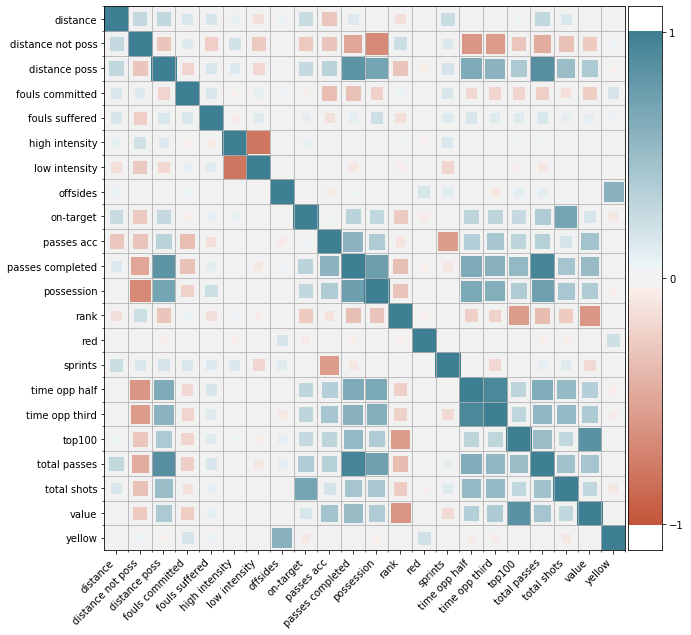

In [260]:
# Feature importance to win a match from all 384 games (2018, 2014, 2020)
import plotly.graph_objs as go
from sklearn.ensemble import ExtraTreesClassifier
from heatmap import heatmap, corrplot
import seaborn as sns


games_comb_df = pd.concat([games_10_df, games_14_df, games_18_df])

features_list = np.sort(["passes completed", "total passes", "passes acc", "total shots", "on-target", "possession",
                         "distance", "distance poss", "distance not poss", "offsides", "fouls committed", "fouls suffered",
                         "yellow", "red", "high intensity", "low intensity", "sprints", "time opp half", "time opp third",
                         "value", "top100", "rank"])

features = games_comb_df[features_list]
labels = games_comb_df["WDL"]

#importance_model = ExtraTreesClassifier()
#importance_model.fit(features, labels)
#feat_importances = pd.DataFrame(importance_model.feature_importances_, index=features_list, columns=["Scores"])
#print(feat_importances)

correlations = dict()
features = games_comb_df[features_list]

for feat in features:
    correlations[feat] = features[feat].corr(labels)

correlations = dict(sorted(correlations.items(), key=lambda k: k[1], reverse=True))
corrDf = pd.DataFrame.from_dict(correlations, orient='index', columns=["corr value"])
fig = px.bar(corrDf, x=corrDf.columns[0], y=corrDf.index, 
            text='corr value', orientation='h', height=700, color='corr value',
             color_continuous_scale=px.colors.diverging.RdYlGn)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside',
                 hovertemplate = "%{label} <br>Correlation: %{text:.5f}")
fig.update_layout(title="Feature Correlation to Match Result",
                  xaxis_title="Correlation Value",
                  yaxis_title="Feature",
                  xaxis=dict(range=[-1, 1]),
                  paper_bgcolor='rgb(0,0,0,0)',
                  plot_bgcolor='rgb(242, 243, 245,0)')
fig.show()
plt.figure(figsize=(10, 10))
corrplot(features.corr(), size_scale=600);


In [329]:
# Feature importance to win a match from all 384 games (2018, 2014, 2020)

from sklearn.ensemble import ExtraTreesClassifier

games_comb_df = pd.concat([games_10_df, games_14_df, games_18_df])

features_list = np.sort(["passes completed", "total passes", "passes acc", "total shots", "on-target", "possession",
                         "distance", "distance poss", "distance not poss", "offsides", "fouls committed", "fouls suffered",
                         "yellow", "red", "high intensity", "low intensity", "sprints", "time opp half", "time opp third",
                         "value", "top100", "rank"])

features = games_comb_df[features_list]
labels = games_comb_df["WDL"]

num_runs = 10
avg_importance_scores_df = pd.DataFrame(index=features_list)

for i in range(num_runs):
    importance_model = ExtraTreesClassifier()
    importance_model.fit(features, labels)
    feat_importances = pd.DataFrame(importance_model.feature_importances_, index=features_list, columns=["Scores"])
    avg_importance_scores_df["Run " + str(i)] = feat_importances

avg_importance_scores_df = np.round(np.mean(avg_importance_scores_df, axis=1), 3)
avg_importance_scores_df = avg_importance_scores_df.sort_values(ascending=True)

fig = px.bar(feat_importances, x=avg_importance_scores_df, y=avg_importance_scores_df.index, 
             orientation='h', text=avg_importance_scores_df, height=700, color=avg_importance_scores_df,
             color_continuous_scale=px.colors.diverging.RdYlGn
            )
fig.update_layout(title="Average Feature Importance to Win a Match",
                  xaxis_title="Feature",
                  yaxis_title="Importance Score",
                  paper_bgcolor='rgb(0,0,0,0)',
                  plot_bgcolor='rgb(242, 243, 245,0)'
                 )

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside',
                 hovertemplate = "%{label} <br>Importance: %{text:.3f}")
fig.show()

# Prediction Models:

**Some notes:**

1. On train/test splitting - the split is done randomly using a constant seed of 0.
2. Normalization defaults to true in the functions below. Normalization forces each feature's mean to zero and each feature's standard deviation to 1.

**Models:** 

1. Random Forest
2. Decision Tree
3. Linear Regression
4. Ridge Regression
5. Gaussian Naive Bayes -- seems to have a nice correlation between training and testing accuracies 
6. Support Vector Classifier


#### Prepare and export data 

In [330]:
features_array = np.flip(np.array(avg_importance_scores_df.index))
"""
# Export data needed for prediction models to be used in other files
features_array = np.flip(np.array(avg_importance_scores_df.index))

pickle_out = open("./data/games_dfs.pickle","wb")
games_dict = {"games_10_df": games_10_df, "games_14_df": games_14_df, "games_18_df": games_18_df,
              "games_comb_df": games_comb_df, "avg_importance_scores_df": avg_importance_scores_df,
              "features_list": features_list, "features_array": features_array}
pickle.dump(games_dict, pickle_out)
pickle_out.close()
""" 

features_dict = {
    "out_of_game" : ["value","top100","rank"],
    "in_game" : ["passes completed", "total passes", "passes acc", "total shots", "on-target", "possession",
                  "distance", "distance poss", "distance not poss", "offsides", "fouls committed", "fouls suffered",
                  "yellow", "red", "high intensity", "low intensity", "sprints", "time opp half", "time opp third"],
    "all_features" : features_list
}

### Some imports and function definitions

In [331]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Local imports - these functions are located in ./local_definitions.py
from local_definitions import plot_confusion_matrix
from local_definitions import plot_accuracy_with_errorbar
from local_definitions import plot_accuracy
from local_definitions import print_max_accuracy

In [332]:
# Perform cross validation to determine the best number of features according to the training set

def loop_features_cv(clf, test_size=0.3, normalize=True, random=0):
    """
    This function trains and tests a given model looping over the number of features, which increases from 1 to 22,
    and performs cross validation on the training set. Returns the average cross validation score for each amount
    of features
        Inputs:
           clf: sklearn classifier
           test_size: percentage of data to use for testing (between 0 and 1)
           normalize: boolean indicating whether to normalize/standardize the data.
           random: None for random train/test split and model initializations. Any int to supply a seed for random numbers.
        Outputs:
           cv_scores: [1x22] array of cross validation scores 
           test_scores: [1x22] array of testing accuracy values 
    """
    
    n_total_features = len(avg_importance_scores_df.index)
    
    cv_scores = np.zeros(n_total_features)
    test_scores = np.zeros(n_total_features)
    for num_features in range(1, n_total_features + 1):

        features_array = np.flip(np.array(avg_importance_scores_df.index))
        X = games_comb_df[features_array[0:num_features]]
        y = games_comb_df["WDL"]

        if normalize:
            # Normalize data to mean=0 and std=1
            X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        
        # Split data into training and testing (random_state=0 is a random seed)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random)

        # Standardize data: 
        scaler = StandardScaler()
        # fit on training set only
        scaler.fit(X_train) 
        # apply transform to both training and testing set
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Perform cross validation on the training set (default is 5-fold CV)
        cv_results = cross_validate(clf, X_train, y_train) 
        cv_scores[num_features - 1] = np.mean(cv_results["test_score"])
        
        # Fit the model using current number of features
        clf.fit(X_train, y_train)
        
        # Test the model
        test_scores[num_features - 1] = clf.score(X_test, y_test)
        
    return cv_scores, test_scores

## Random Forest

Cross Validation accuracy : 0.549
Training set accuracy     : 1.000
Testing set accuracy      : 0.586


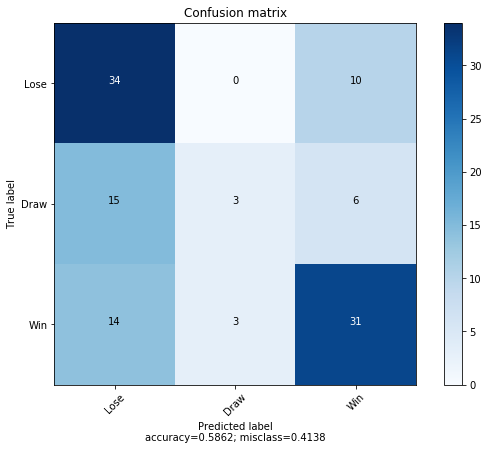

In [333]:
# Model 1: Random Forest (default = 100 Trees)
# One amount of features at a time

from sklearn.ensemble import RandomForestClassifier

binary = False # Binary Classification Flag. 
random = None  # None for random data split and random initialization of model. Any integer for a seed.

# which classifier? how many estimators? how many features? (enter None for all features)
clf = RandomForestClassifier(n_estimators=100, random_state=random)
# clf = DecisionTreeClassifier(random_state=random) # if you want to try decision tree, go ahead
n_feats = None; 

# Split data into train, test sets
X = np.array(games_comb_df[features_array[0:n_feats]])
y = np.array(games_comb_df['WDL'])
if binary:
    y[y==0] = -1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random)

pipeline = Pipeline([
        ('scale', StandardScaler()),
        ('clf', clf)])

# Perform cross validation on the training set (default is 5-fold CV)
cv_results = cross_validate(pipeline, X_train, y_train)
cv_score = np.mean(cv_results["test_score"])

# Train and test classifier
pipeline.fit(X_train, y_train)
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print("Cross Validation accuracy : %.3f" % cv_score)
print("Training set accuracy     : %.3f" % train_score)
print("Testing set accuracy      : %.3f" % test_score)

# Confusion Matrix
preds = pipeline.predict(X_test)
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm, ['Lose', 'Draw', 'Win'], normalize=False)

In [334]:
# Iterate over a successive amount of features, taking the average of a number of random splits for each
# This improves upon loop_features_cv(), since that did not average over a number of random iterations, where this does
# This could be transformed into a function... hint hint

binary = False  # Binary Classification Flag. 
random = None      # None for random data split and random initialization of model. Any integer for a seed.
iterations = 5  # number of runs per amount-of-features

# which classifier?
clf = RandomForestClassifier(n_estimators=100, random_state=random)

# choose number of features
n_feats = 22 # loop from 1 to 22 most-important features
# ------------------------------------------------------------------------

# Initialize results array and pipeline
feats = np.arange(1, n_feats+1) 
results = np.zeros((3, n_feats, iterations)) # 3 ==> CV, train, test
pipeline = Pipeline([('scale', StandardScaler()), ('clf', clf)])

for j in range(n_feats):
    # Split data into train, test sets
    X = np.array(games_comb_df[features_array[0:feats[j]]])
    y = np.array(games_comb_df['WDL'])
    if binary:
        y[y==0] = -1
    for i in range(iterations):
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random)

        # Perform cross validation on the training set (default is 5-fold CV)
        cv_results = cross_validate(pipeline, X_train, y_train)
        cv_score = np.mean(cv_results["test_score"])

        # Train and test classifier
        pipeline.fit(X_train, y_train)
        train_score = pipeline.score(X_train, y_train)
        test_score = pipeline.score(X_test, y_test)
        results[:, j, i] = [cv_score, train_score, test_score]

mean_results = np.mean(results, axis=2)
std_results = np.std(results, axis=2)
results_df = pd.DataFrame(np.concatenate((mean_results, std_results),axis=0).T, 
                          columns=["Cross Validation Mean", "Training Mean", "Testing Mean", 
                                   "Cross Validation Std", "Training Std", "Testing Std"])
# return results_df

# Display results
plot_accuracy(feats, results_df["Cross Validation Mean"], results_df["Testing Mean"], clf_name='Random Forest')

Max score in training: = 0.573 with 17 features
Max score in testing: = 0.583 with 12 features


In [286]:
# Comparing Random Forest performance when using IN-GAME versus OUT-OF-GAME features
# I know, it's a large cell. I'm sorry

# Loop from 1 to max_est trees in the random forest
min_est = 1
max_est = 100
estimators = np.arange(min_est, max_est + 1, 1)

# Split data into training and testing
test_size=0.30

binary = False # Binary Classification Flag. 
random = 0 # None for random data split and random initialization of model. Any integer for a seed.

fig1 = go.Figure()
fig2 = go.Figure()
fig3 = go.Figure()

feature_type_list = ["out_of_game", "in_game", "all_features"]
comparison_results_dict = {}
for curr in feature_type_list:

    n_total_features = len(features_dict[curr])
    X = np.array(games_comb_df[features_dict[curr]])
    y = np.array(games_comb_df["WDL"])

    # Normalize data to mean=0 and std=1
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # Split data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random)
    
    n = len(estimators)
    cv_scores    = np.zeros(n)
    train_scores = np.zeros(n)
    test_scores  = np.zeros(n)

    for num_est in estimators:

        clf = RandomForestClassifier(n_estimators=num_est, random_state=random)

        # Perform cross validation on the training set (default is 5-fold CV)
        cv_results = cross_validate(clf, X_train, y_train) 
        cv_scores[num_est - min_est] = np.mean(cv_results["test_score"])

        # Fit model to training data and score it's performance on testing data
        clf.fit(X_train, y_train)
        train_scores[num_est - min_est] = clf.score(X_train, y_train)
        test_scores[num_est - min_est] = clf.score(X_test, y_test)
    
    # Add results to dictionary
    comparison_results_dict[curr + "_cv"] = cv_scores
    comparison_results_dict[curr + "_train"] = train_scores
    comparison_results_dict[curr + "_test"] = test_scores
    
    fig1.add_trace(go.Scatter(
    x=estimators, 
    y=comparison_results_dict[curr + "_cv"],
    name=curr))
    
    fig2.add_trace(go.Scatter(
    x=estimators, 
    y=comparison_results_dict[curr + "_train"],
    name=curr))
    
    fig3.add_trace(go.Scatter(
    x=estimators, 
    y=comparison_results_dict[curr + "_test"],
    name=curr))
    
# Plot figure (Cross Validation scores)
fig1.update_layout(title="Cross Validation scores",
                  xaxis_title="number of estimators in random forest",
                  yaxis_title="accuracy")
fig1.show()

# Plot figure (Accuracy on training set)
fig2.update_layout(title="Training set scores",
                  xaxis_title="number of estimators in random forest",
                  yaxis_title="accuracy")
fig2.show()

# Plot figure (Accuracy on testing set)
fig3.update_layout(title="Testing set scores",
                  xaxis_title="number of estimators in random forest",
                  yaxis_title="accuracy")
fig3.show()

In [287]:
# THIS TAKES VERY LONG TO RUN

# # Model 1: Random Forest 
# # (Varying number of trees AND number of features)
# # produces a 3d plot

# # What are the best values for the number of trees and the number of features to use? 

# features_array = np.flip(np.array(avg_importance_scores_df.index))

# # max number of trees in the random forest
# max_estimators = 150

# # arrays / lists
# arr_est = np.arange(1, max_estimators + 1)
# arr_feat = np.arange(1, len(features_array) + 1)

# # labels
# y = games_comb_df["WDL"]

# # analysis variables
# best_score = 0
# best_est = 0
# best_feat = 0
# scores_2d = np.zeros((max_estimators, len(features_array)))

# for num_est in arr_est:
#     # Define Model
#     random_forest = RandomForestClassifier(n_estimators=num_est, random_state=0)
#     for num_feat in arr_feat:
        
#         # Split data into training and testing
#         X = games_comb_df[features_array[0:num_feat]]
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#         # Cross Validation
#         cv_results = cross_validate(random_forest, X_train, y_train)
#         mean_score = np.mean(cv_results["test_score"])
#         if mean_score > best_score:
#             best_score = mean_score
#             best_est = num_est
#             best_feat = num_feat
#         scores_2d[num_est-1][num_feat-1] = mean_score

"""
import pickle

rf_3d_plot_results = {"scores_2d" : scores_2d, "x-axis" : np.arange(1, 23), "y-axis" : np.arange(1, 151)}

pickle_out = open("rf_3d_plot_results.pickle","wb")
pickle.dump(rf_3d_plot_results, pickle_out)
pickle_out.close()
"""

'\nimport pickle\n\nrf_3d_plot_results = {"scores_2d" : scores_2d, "x-axis" : np.arange(1, 23), "y-axis" : np.arange(1, 151)}\n\npickle_out = open("rf_3d_plot_results.pickle","wb")\npickle.dump(rf_3d_plot_results, pickle_out)\npickle_out.close()\n'

In [298]:
# This cell will plot the 3d graph from memory, so your computer does not have to do any work :)

pickle_in = open("./results/rf_3d_plot_results.pickle", "rb")
rf_3d_plot_results = pickle.load(pickle_in)

fig = go.Figure(data=[go.Surface(
    z=rf_3d_plot_results["scores_2d"], 
    y=rf_3d_plot_results["y-axis"], 
    x=rf_3d_plot_results["x-axis"])])
fig.update_layout(scene=dict(
    xaxis_title="x = num feat", 
    yaxis_title="y = num estimators", 
    zaxis_title="z = accuracy"))
fig.show()
best_score = rf_3d_plot_results["best_score"]
best_feat = rf_3d_plot_results["best_feat"]
best_est = rf_3d_plot_results["best_est"]
print(f"Best score = {best_score} using {best_feat} features and {best_est} estimators.")

Best score = 0.6155810481653178 using 8 features and 96 estimators.


In [300]:
py.plot(fig, filename = '3d_plot', auto_open=True)
#pio.write_html(fig, file='index.html', auto_open=True)
tls.get_embed('https://plotly.com/~acpoll/11/#/') #change to your url

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~acpoll/11.embed" height="525" width="100%"></iframe>'

In [289]:
# Let's break down the surface into the average of each axis

mean_over_estimates = np.mean(rf_3d_plot_results["scores_2d"], axis=0)

fig = go.Figure(go.Scatter(
    x=rf_3d_plot_results["x-axis"],
    y=mean_over_estimates,
))

fig.update_layout(
      title=f"cross validation scores averaged over n_estimators",
      xaxis_title='number of features',
      yaxis_title='average cross validation score')

fig.show()

mean_over_features = np.mean(rf_3d_plot_results["scores_2d"], axis=1)

fig = go.Figure(go.Scatter(
    x=rf_3d_plot_results["y-axis"],
    y=mean_over_features,
))

fig.update_layout(
      title=f"cross validation scores averaged over n_features",
      xaxis_title='number of estimators',
      yaxis_title='average cross validation score')

fig.show()

## Neural Networks!

Why doesn't it think any of the games end in a **draw**?

In [290]:
# Classification using Neural Network

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

binary = False
random = 42  # None for random data split and random initialization of model. Any integer for a seed.

# how many features to use? (None for all features, max=22)
n_feats = 5; 

# Define classifier and hyperparameter values to iterate over (5-fold CV)
clf = MLPClassifier(solver='lbfgs', random_state=random)
hyperparameters = {
    'clf__hidden_layer_sizes' : [(2,),(3,),(4,),(2,2),(4,4),(5,2),(4,2)],
    'clf__alpha' : [5,10] # regularization parameter, helps avoid overfitting
}

# Split data into train, test sets
X = pd.DataFrame(games_comb_df[features_array[0:n_feats]])
y = pd.DataFrame(games_comb_df['WDL'])
if binary:
    y[y==0] = -1 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random)

pipeline = Pipeline([
        ('scale', StandardScaler()),
        ('clf', clf)])
      
# Do a grid search with cross validation to find the best hyperparameter values
grid = GridSearchCV(pipeline, param_grid=hyperparameters, cv=5, verbose=0, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Display results
cols_of_interest = ['mean_test_score', 'std_test_score', 'rank_test_score'] + [c.replace('clf', 'param_clf') for c in hyperparameters.keys()]
results = pd.DataFrame(grid.cv_results_).sort_values(by=['mean_test_score'], ascending=False)[cols_of_interest]
results.head(10) 

,mean_test_score,std_test_score,rank_test_score,param_clf__hidden_layer_sizes,param_clf__alpha
0,0.638155,0.037278,1,"(2,)",5
3,0.638085,0.041479,2,"(2, 2)",5
7,0.638085,0.038029,2,"(2,)",10
1,0.634382,0.031859,4,"(3,)",5
9,0.634382,0.033944,4,"(4,)",10
11,0.634382,0.039543,4,"(4, 4)",10
13,0.634382,0.033944,4,"(4, 2)",10
6,0.634312,0.045127,8,"(4, 2)",5
8,0.630678,0.035245,9,"(3,)",10
4,0.630608,0.036096,10,"(4, 4)",5


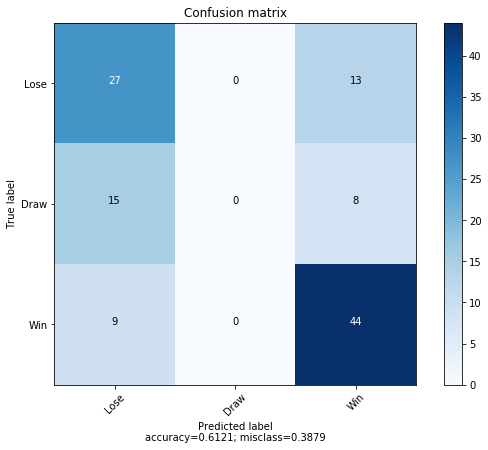

In [291]:
grid.refit

labels = ['Lose or Draw', 'Win'] if binary else ['Lose', 'Draw', 'Win']

preds = grid.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, preds), labels, normalize=False)

## Linear and Ridge Regression

Testing accuracy: 0.42


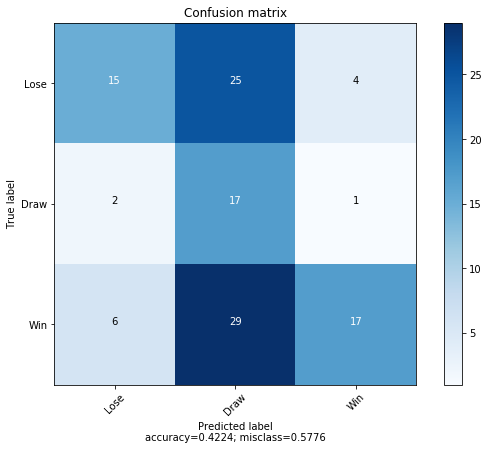

Coefficients: 
 [-0.0548107  -0.19061663  0.31729267 -0.02022734  0.01232293  0.07918878
 -0.00461141  0.08337664  0.4346888   0.0659589   0.11440005  0.19732439
 -0.27011344 -0.13798937  0.12327204 -0.30630678 -0.07372316  0.00323437
 -0.50720216 -0.18887244  0.14375174  0.04032686]
Mean squared error: 0.84
Coefficient of determination: -0.02


In [345]:
# Model 3: Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

print_actual_predictions = False 
random = None # None for random data split and random initialization of model. Any integer for a seed.

X = np.array(games_comb_df[features_list])
y = np.array(games_comb_df["WDL"])

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random)

# Standardize data: 
scaler = StandardScaler()
# fit on training set only
scaler.fit(X_train) 
# apply transform to both training and testing set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Test the model
predictions = linear_regression.predict(X_test)
predictions = np.round(predictions).astype(int)
predictions[predictions >= 0.5] = 1
predictions[predictions <= -0.5] = -1

if print_actual_predictions:
    print("Predictions:")
    print(predictions)
    print("True labels: ")
    print(np.array(y_test))

test_accuracy = accuracy_score(y_test, predictions)
print("Testing accuracy: %.2f" % test_accuracy)

cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, ['Lose', 'Draw', 'Win'], normalize=False)

from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', linear_regression.coef_)
# The mean squared error
print('Mean squared error: %.2f'
    % mean_squared_error(y_test, predictions))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, predictions))

Testing accuracy: 0.36


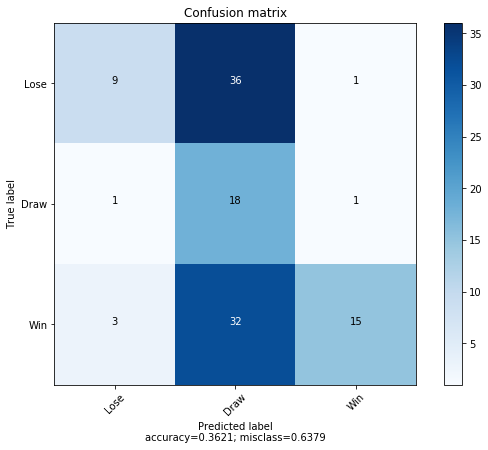

In [293]:
# Model 4: Ridge Regression

# Note: since this is a regression model, we need to map the model's predictions to our 
# labels to perform classification. This has not been done yet, which causes the prediction
# accuracy (score) to be too low.

from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score

print_actual_predictions = False
random = None # None for random data split and random initialization of model. Any integer for a seed., normalize=False

X = np.array(games_comb_df[features_list])
y = np.array(games_comb_df["WDL"])

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random)

# Standardize data: 
scaler = StandardScaler()
# fit on training set only
scaler.fit(X_train) 
# apply transform to both training and testing set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
ridge_regression = Ridge(alpha=1.0)
ridge_regression.fit(X_train, y_train)

# Test the model
predictions = ridge_regression.predict(X_test)
predictions = np.round(predictions).astype(int)
predictions[predictions >= 0.5] = 1
predictions[predictions <= -0.5] = -1

if print_actual_predictions:
    print("Predictions:")
    print(predictions)
    print("True labels: ")
    print(np.array(y_test))

test_accuracy = accuracy_score(y_test, predictions)
print("Testing accuracy: %.2f" % test_accuracy)

cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, ['Lose', 'Draw', 'Win'], normalize=False)

## Gaussian Naive Bayes & Support Vector Classifier

Accuracy of gaussian naive bayes using all features: 0.5517241379310345


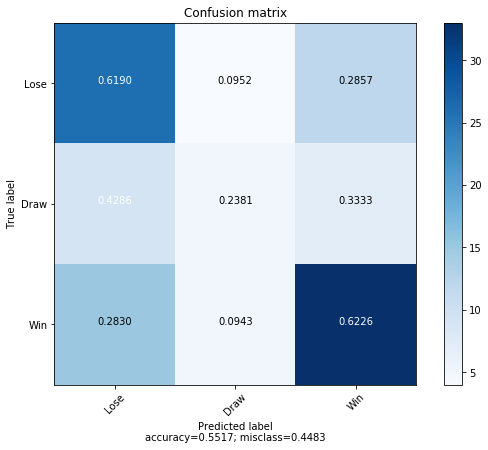

In [294]:
# Model 5: Gaussian Naive Bayes
# Using all features

from sklearn.naive_bayes import GaussianNB

print_actual_predictions = False
random = None # None for random data split and random initialization of model. Any integer for a seed.

X = np.array(games_comb_df[features_list])
y = np.array(games_comb_df["WDL"])

# Normalize data to mean=0 and std=1
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=random)

# Train the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Test the model
accuracy = gnb.score(X_test, y_test)
predictions = gnb.predict(X_test)
print(f"Accuracy of gaussian naive bayes using all features: {accuracy}")

if print_actual_predictions:
    print("Prediction:")
    print(gnb.predict(X_test))
    print("True labels:")
    print(np.array(y_test))

cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, ['Lose', 'Draw', 'Win'])

In [301]:
# Comparing Gaussian Naive Bayes performance when using IN-GAME versus OUT-OF-GAME features over 100 random splits

out_scores = np.zeros(100)
out_scores_test = np.zeros(100)
in_scores = np.zeros(100)
in_scores_test = np.zeros(100)
all_scores = np.zeros(100)
all_scores_test = np.zeros(100)

clf = GaussianNB()

for rand_iter in range(100):

    # Split data into training and testing
    test_size=0.30

    # Perform cross validation and testing using out of game features

    features_array = ["value", "rank", "top100"]
    n_total_features = len(features_array)

    X = games_comb_df[features_array]
    y = games_comb_df["WDL"]

    # Normalize data to mean=0 and std=1
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # Split data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_iter)

    # Perform cross validation on the training set (default is 5-fold CV)
    cv_results = cross_validate(clf, X_train, y_train) 
    out_scores[rand_iter] = np.mean(cv_results["test_score"])

    # Fit model to training data and score it's performance on testing data
    clf.fit(X_train, y_train)
    out_scores_test[rand_iter] = clf.score(X_test, y_test)


    # Perform cross validation and testing using in game features

    features_array = ["passes completed", "total passes", "passes acc", "total shots", "on-target", "possession",
                      "distance", "distance poss", "distance not poss", "offsides", "fouls committed", "fouls suffered",
                      "yellow", "red", "high intensity", "low intensity", "sprints", "time opp half", "time opp third"]
    n_total_features = len(features_array)

    X = games_comb_df[features_array]
    y = games_comb_df["WDL"]

    # Normalize data to mean=0 and std=1
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # Split data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_iter)

    # Perform cross validation on the training set (default is 5-fold CV)
    cv_results = cross_validate(clf, X_train, y_train) 
    in_scores[rand_iter] = np.mean(cv_results["test_score"])

    # Fit model to training data and score it's performance on testing data
    clf.fit(X_train, y_train)
    in_scores_test[rand_iter] = clf.score(X_test, y_test)

    # Perform cross validation and testing using all features

    features_array = ["passes completed", "total passes", "passes acc", "total shots", "on-target", "possession",
                      "distance", "distance poss", "distance not poss", "offsides", "fouls committed", "fouls suffered",
                      "yellow", "red", "high intensity", "low intensity", "sprints", "time opp half", "time opp third",
                      "value", "top100", "rank"]
    n_total_features = len(features_array)

    X = games_comb_df[features_array]
    y = games_comb_df["WDL"]

    # Normalize data to mean=0 and std=1
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # Split data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_iter)

    # Perform cross validation on the training set (default is 5-fold CV)
    cv_results = cross_validate(clf, X_train, y_train) 
    all_scores[rand_iter] = np.mean(cv_results["test_score"])

    # Fit model to training data and score it's performance on testing data
    clf.fit(X_train, y_train)
    all_scores_test[rand_iter] = clf.score(X_test, y_test)

# Plot figure (CV test scores)

xx = ["in game features only", "out of game features only", "all features"]
yy = [np.mean(in_scores), np.mean(out_scores), np.mean(all_scores)]
yy_test = [np.mean(in_scores_test), np.mean(out_scores_test), np.mean(all_scores_test)]

fig = go.Figure(go.Bar(
    x=xx,
    y=yy,
    name="training set w/ CV"))
fig.add_trace(go.Bar(
    x=xx,
    y=yy_test,
    name="testing set"))
fig.update_layout(title="Accuracy with Gaussian Naive Bayes (Average over 100 random splits)",
                  yaxis_title="accuracy")
fig.show()

In [357]:
# Model 6: Support Vector [machine?] Classifier

from sklearn.svm import SVC

features_array = np.flip(np.array(avg_importance_scores_df.index))
n_total_features = len(features_array)

clf = SVC(kernel='linear') #default c=1.0 #kernel='linear' or 'rbf' (radial basis function) or 'poly'

mat_train_scores = np.zeros((100, n_total_features))
mat_test_scores = np.zeros((100, n_total_features))

for i in range(100):
    train_scores, test_scores = loop_features_cv(clf, test_size=0.3, random=None)
    mat_train_scores[i, :] = train_scores
    mat_test_scores[i, :] = test_scores

# Plot results
mean_train_scores = np.mean(mat_train_scores, axis=0)
mean_test_scores = np.mean(mat_test_scores, axis=0)

xx = np.arange(1, n_total_features + 1)
plot_accuracy(xx, mean_train_scores, mean_test_scores, clf_name="Support Vector Classifier")

# # Plot results with error bars
# train_3std = 3 * np.std(mat_train_scores, axis=0)
# test_3std = 3 * np.std(mat_test_scores, axis=0)

# df = svm_rbf_100_iter_30_70_df = {"mat_train_scores" : mat_train_scores,
#                           "mat_test_scores" : mat_test_scores,
#                           "train_3std" : train_3std, # 3* standard deviation of the accuracies over the 100 random iters
#                           "test_3std" : test_3std,
#                           "mean_train_scores" : mean_train_scores, # avg accuracies over 100 iterations 
#                           "mean_test_scores" : mean_test_scores,
#                           "num_total_features" : n_total_features,
#                           "xaxis" : xx,
#                           "description" : "SVC, RBF Kernel, C=1, 100 random iterations, 30/70 splits"}

# plot_accuracy_with_errorbar(df["xaxis"], df["mean_train_scores"], df["train_3std"], df["mean_test_scores"], df["test_3std"], 
#                             clf_name=df["description"])

Max score in training: = 0.615 with 5 features
Max score in testing: = 0.618 with 7 features


## Comparison: how does test/train split percentage affect overfitting of SVM?

In [302]:
pickle_in = open(f"./results/svm_linear_100_iters.pickle","rb")
svm_linear_list = pickle.load(pickle_in)
pickle_in.close()

for df in svm_linear_list:
    plot_accuracy_with_errorbar(df["xaxis"], df["mean_train_scores"], df["train_3std"], df["mean_test_scores"], df["test_3std"], 
                            clf_name=df["description"])

Max score in training: = 0.614 with 5 features
Max score in testing: = 0.616 with 9 features


Max score in training: = 0.612 with 5 features
Max score in testing: = 0.613 with 9 features


Max score in training: = 0.61 with 5 features
Max score in testing: = 0.613 with 5 features


Max score in training: = 0.61 with 6 features
Max score in testing: = 0.613 with 7 features


Max score in training: = 0.611 with 5 features
Max score in testing: = 0.614 with 6 features


Max score in training: = 0.518 with 22 features
Max score in testing: = 0.524 with 22 features
